# Homework 2: Univariate Statistics

In [2]:
MY_UNIQNAME = 'huangmy'

### The total score for this assignment will be 80 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, puctuation, etc. of written sentences.
- 10 pt: Codes are written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 60 pt: Homework questions. 

## 0. Download the data from: 

* [https://www.kaggle.com/mylesoneill/world-university-rankings](https://www.kaggle.com/mylesoneill/world-university-rankings)

There are three rankings of universities included in the dataset: Center for World University Rankings (*CWUR*), Times Higher Education World University Rankings (*Times*), and Academic Ranking of World Universities (ARWU, or *Shanghai*).

Look at the column descriptions on the Kaggle page. Note that for some columns, there may be some missing values or values that may need some munging in order for your analysis to succeed. **Be sure to look at the values in the columns you work with using `describe()`**—if data are missing or nonsensical, this may suggest that you need to take extra steps to read them in properly.

In [2]:
# Read the data first
import pandas as pd
import numpy as np

# Read three kinds of rankings data
cwu = pd.read_csv("data/homework2/cwurData.csv")
# cwu = cwu.dropna()
shanghai = pd.read_csv("data/homework2/shanghaiData.csv")
# shanghai = shanghai.dropna()
times = pd.read_csv("data/homework2/timesData.csv")
# times = times.dropna()

# deal with data properly
print(cwu.describe())
print(shanghai.describe())
print(times.describe())


        world_rank  national_rank  quality_of_education  alumni_employment  \
count  2200.000000    2200.000000           2200.000000        2200.000000   
mean    459.590909      40.278182            275.100455         357.116818   
std     304.320363      51.740870            121.935100         186.779252   
min       1.000000       1.000000              1.000000           1.000000   
25%     175.750000       6.000000            175.750000         175.750000   
50%     450.500000      21.000000            355.000000         450.500000   
75%     725.250000      49.000000            367.000000         478.000000   
max    1000.000000     229.000000            367.000000         567.000000   

       quality_of_faculty  publications    influence    citations  \
count         2200.000000   2200.000000  2200.000000  2200.000000   
mean           178.888182    459.908636   459.797727   413.417273   
std             64.050885    303.760352   303.331822   264.366549   
min              1.00

#### Some observations afte data description
* All these three datasets contain some missing values since their count values in columns are different. Thus we may need to use dropna operations to delete them.

## 1. Answer the questions below. 
- Write your Python code that can answer the following questions, and
- Explain your answers in plain English. 

### For 10 Points: Compare the distributions of the scores across the three rankings

* Plot histograms and boxplots (or any other plots that you think to be helpful) for the overall scores for the CWUR, Times, and Shanghai rankings. What can you say about them?

Text(0.5,15,'score')

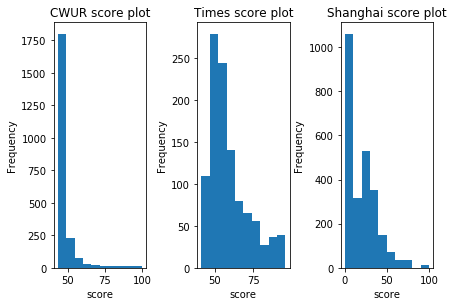

In [3]:
# put your code here
# cwu-score, shanghai-total_score, times-total_score
%matplotlib inline
import matplotlib.pyplot as plt 

# histplot
fig, axs = plt.subplots(1, 3)
plt.tight_layout(w_pad=2)
# CWUR dataset
ax = cwu.score.plot.hist(title='CWUR score plot', ax=axs[0])
ax.set_xlabel('score')
ax.set_ylabel('Frequency')
# Times dataset
times_droped = times.dropna()
times_droped = times_droped[times_droped['total_score'] != '-'] 
ax = times_droped.total_score.astype(float).plot.hist(title='Times score plot', ax=axs[1])
ax.set_xlabel('score')
# Shanghai dataset
ax = shanghai.total_score.plot.hist(title='Shanghai score plot', ax=axs[2])
ax.set_xlabel('score')

[Text(0.5,15,'score'), Text(0.5,1,'Shanghai score boxplot')]

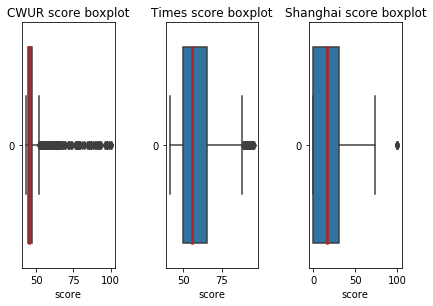

In [4]:
# boxplot
import seaborn as sns
# change line in the middle
f, axes = plt.subplots(1, 3)
plt.tight_layout(w_pad=2)

medianprops = dict( linewidth=2.5, color='firebrick') # color = 'yellow'
# CWUR dataset
ax = sns.boxplot(medianprops=medianprops,data=cwu.score.values,orient='h', whis=1.5, ax=axes[0])
plt.xticks(rotation=0) # rotation=90
ax.set(xlabel='score', title='CWUR score boxplot')

# Times
ax = sns.boxplot(medianprops=medianprops,data=times_droped.total_score.values,orient='h', whis=1.5, ax=axes[1]) # orient = 'h'
# whiskers is used to show the extension of the rest of distribution
plt.xticks(rotation=0) # rotation=90
ax.set(xlabel='score', title='Times score boxplot')

# Shanghai dataset
ax = sns.boxplot(medianprops=medianprops,data=shanghai.total_score.values,orient='h', whis=1.5, ax=axes[2])
plt.xticks(rotation=0) # rotation=90
ax.set(xlabel='score', title='Shanghai score boxplot')

#### Comment 
The distributions of the scores across the three rankings differ a lot:
* CWUR score distribution plots show that most of its scores are lower than 50. And only a few scores can be very high or near 100.
* Shanghai score distribution plots show that the median of its scores is also below 50 but the majority contains wider ranges.
* Compared with the first two rankings, the median of Times scores should be the highest and it is higher than 50 in the boxplot. Also, most of its scores are within 50 and 75, which indicates that its variation should be smaller.

### For 10 Points: Using the Times data, look at the number of students (`num_students` column) for all universities in 2015.

* Plot the distribution using the `multiplePlots` function from Lab 3. What does it look like?
* Compare the mean and median. Are they similar or different, and why?
* Which school has the most students?

C:\Users\TK\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Mean of Times number of students in 2015: 23638.576923076922
Median of Times number of students in 2015: 21086.5
Max of Times number of students in 2015: 120986
The school having the most students: Sapienza University of Rome


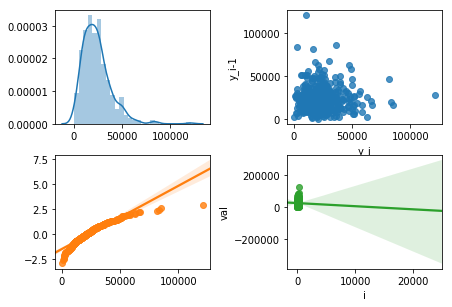

In [5]:
from scipy import stats # just in case we didn't already do it
import copy

def multiplePlots(series):
    fig, axs = plt.subplots(2,2)
    plt.tight_layout(pad=0.4, w_pad=4, h_pad=1.0)
    # Histogram
    # ax define the position for sub plot
    sns.distplot(series, ax=axs[0,0])
    
    # Lag plot
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False, ax=axs[0,1])
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")
    
    # QQ plot
    qntls, xr = stats.probplot(series, fit=False)
    sns.regplot(xr,qntls, ax=axs[1,0])
    
    # Run sequence
    ax = sns.regplot(np.arange(len(series)),series, ax=axs[1,1])
    ax.set_ylabel("val")
    ax.set_xlabel("i")

# plot the distribution with multiplePlots first
times_2015 = times[times['year'] == 2015]
times_num_student = times_2015.num_students.dropna()
times_num_student = times_num_student.str.replace(',', '').astype(int).values
multiplePlots(times_num_student)

# find mean and median
print('Mean of Times number of students in 2015:', np.mean(times_num_student))
print('Median of Times number of students in 2015:', np.median(times_num_student))
print('Max of Times number of students in 2015:', np.max(times_num_student))

# find the school that has the most students
times_for_most_student = copy.deepcopy(times_2015)
times_for_most_student = times_for_most_student.dropna()
times_for_most_student['num_students'] = times_for_most_student['num_students'].str.replace(',', '').astype(int)
most_uni = times_for_most_student[times_for_most_student['num_students'] == np.max(times_num_student)].university_name.values[0]
print('The school having the most students:', most_uni)

#### Comment 
* The mean of 'num_students' column is 23639 and the the median is 21087. Mean and median values are different here. The calculation of mean needs to consider some extreme points while median only consider the majority thus extreme points may not influence the median a lot.
* The school having the most students is Sapienza University of Rome and it has 120986 students in 2015.
* According to the multiple plots output, the density plot shows that it is a little bit right skewed compared with normal distribution. The QQ plot shows that most of the points are distributed through a line except for extreme points on two sides. Also, randomness of points in lag plot indicates that lag effect can be ignored in this case.

### For 10 points: Using the Times data, compare the international outlook scores (`international` column) for universities in the US versus universities outside the US.

* Plot their distributions for 2011 and describe them. Identify their their mean and median.
* Repeat this for 2016. Has the result changed?

Mean of Times international score in US in 2011: 42.23055555555556
Mean of Times international score outside US in 2011: 61.502521008403356
Median of Times international score in US in 2011: 38.6
Median of Times international score outside US in 2011: 63.2


C:\Users\TK\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


None


C:\Users\TK\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


None


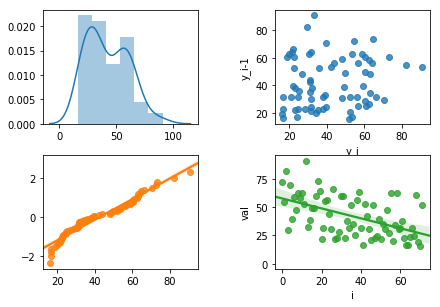

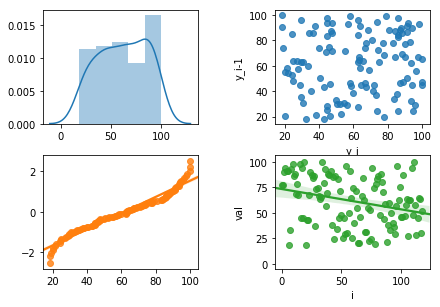

In [6]:
# for year 2011
US_international_2011 = times[(times.country == 'United States of America') 
                              & (times.year == 2011)].international.astype(float).values
not_US_international_2011 = times[(times.country != 'United States of America') 
                                  & (times.year == 2011) 
                                  & (times.international != '-')].international.astype(float).values
# find mean and median
print('Mean of Times international score in US in 2011:', np.mean(US_international_2011))
print('Mean of Times international score outside US in 2011:', np.mean(not_US_international_2011))
print('Median of Times international score in US in 2011:', np.median(US_international_2011))
print('Median of Times international score outside US in 2011:', np.median(not_US_international_2011))

print(multiplePlots(US_international_2011))
print(multiplePlots(not_US_international_2011))

#### Comment for year 2011
* Mean of Times international score in US in 2011: 42.23. Mean of Times international score outside US in 2011: 61.5.
Median of Times international score in US in 2011: 38.6. Median of Times international score outside US in 2011: 63.2
* The QQ plot of 'US international scores' distribution shows that most of the points are located through a line. Lag plot shows that points are randomly distributed. Reg plot shows the trend, which indicates that this distribution may have some bias compared with normal distribution.
* The QQ plot of 'Outside US international scores' distribution shows that it has both tails on two sides. The histogram indicates that it is very likely to be uniform distribution. Lag plot and Reg plot have shown the randomness feature, which means that the correlation can be ignored here. 

Mean of Times international score in US in 2016: 42.43150684931507
Mean of Times international score outside US in 2016: 49.855198776758414
Median of Times international score in US in 2016: 40.2
Median of Times international score outside US in 2016: 47.0


C:\Users\TK\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


None


C:\Users\TK\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


None


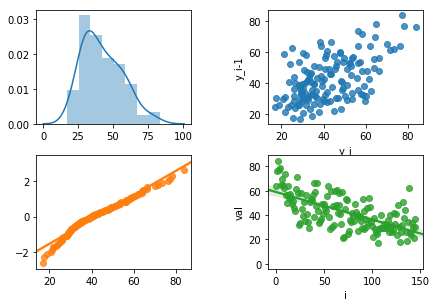

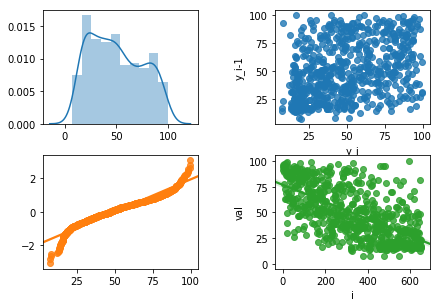

In [7]:
# for year 2016
US_international_2016 = times[(times.country == 'United States of America') 
                              & (times.year == 2016)].international.astype(float).values
not_US_international_2016 = times[(times.country != 'United States of America') 
                                  & (times.year == 2016) 
                                  & (times.international != '-')].international.astype(float).values
# find mean and median
print('Mean of Times international score in US in 2016:', np.mean(US_international_2016))
print('Mean of Times international score outside US in 2016:', np.mean(not_US_international_2016))
print('Median of Times international score in US in 2016:', np.median(US_international_2016))
print('Median of Times international score outside US in 2016:', np.median(not_US_international_2016))

print(multiplePlots(US_international_2016))
print(multiplePlots(not_US_international_2016))

#### Comment for year 2016
* Mean of Times international score in US in 2016: 42.43. Mean of Times international score outside US in 2016: 49.86.
Median of Times international score in US in 2016: 40.2. Median of Times international score outside US in 2016: 47.0.
* The QQ plot and histogram plot of 'US international scores' distribution show that it is right skewed compared with normal distribution. Lag plot and reg plot indicate the trend, which means that it also has some bias compared with normal distribution.
* The QQ plot of 'Outside US international scores' distribution shows that it has both tails on two sides. The histogram indicates that it is very likely to be uniform distribution. Lag plot and Reg plot have shown the randomness feature, which means that the correlation can be ignored here. 
* Generally speaking, the distributions of international scores in 2011 and 2016 are a little bit different.

### For 10 Points: Using the data for the CWUR rankings, investigate how the rankings change over time.

* Which universities consistently appear in the rankings, and which aren't?
* Which universities are rising, falling, or stationary in rank over the years?
* Plot the results, and explain your answers

It might be more intuitive to compare the scores rather than the ranks directly. Feel free to do this if it's the case.

Number of universities that consistently appear in the rankings top 100: 82
The following universities consistently appear in the rankings top 100:
['Boston University' 'Brown University'
 'California Institute of Technology' 'Carnegie Mellon University'
 'Columbia University' 'Cornell University' 'Dartmouth College'
 'Duke University' 'Emory University' 'Georgia Institute of Technology'
 'Harvard University' 'Hebrew University of Jerusalem'
 'Imperial College London' 'Johns Hopkins University'
 'Karolinska Institute' 'Kyoto University'
 'Ludwig Maximilian University of Munich'
 'Massachusetts Institute of Technology' 'McGill University'
 'New York University' 'Northwestern University'
 'Ohio State University, Columbus' 'Osaka University'
 'Pennsylvania State University, University Park'
 'Pierre-and-Marie-Curie University' 'Princeton University'
 'Purdue University, West Lafayette' 'Rockefeller University'
 'Ruprecht Karl University of Heidelberg'
 'Rutgers University-New Brunswick' '

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012DD9059978>,
      dtype=object)

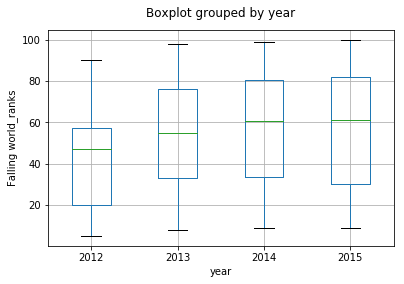

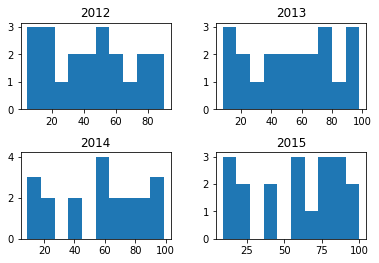

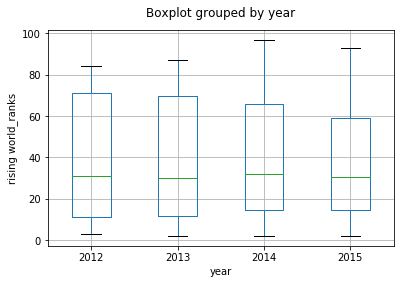

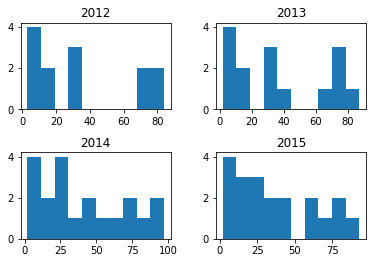

In [8]:
# universities consistently in the rankings in top 100
cwu_year_rank = cwu[['world_rank', 'institution', 'year']]
cwu_year_rank_100 = cwu_year_rank[cwu_year_rank['world_rank'] <= 100]
cwu_groupbyInst = cwu_year_rank_100.groupby('institution')
cwu_groupbyInst_sum = cwu_groupbyInst.size().reset_index(name='Frequency')
cwu_consistent = cwu_groupbyInst_sum[cwu_groupbyInst_sum['Frequency'] == 4].institution.values
cwu_not_consistent = cwu_groupbyInst_sum[cwu_groupbyInst_sum['Frequency'] < 4].institution.values
print('Number of universities that consistently appear in the rankings top 100:', len(cwu_consistent))
print('The following universities consistently appear in the rankings top 100:')
print(cwu_consistent)
print('Number of universities that do not consistently appear in the rankings top 100:', len(cwu_not_consistent))
print('The following universities do not consistently appear in the rankings top 100:')
print(cwu_not_consistent)

# universities are rising, falling, or stationary in rank over the years--from 2012 to 2015
# set up the university list and initialize the dictionary
university_list = cwu_year_rank_100.institution.unique()
rank_dict = {}
# fill in dictionary values
for item in university_list:
    rank_dict[item] = cwu_year_rank_100[cwu_year_rank_100.institution == item].sort_values('year').world_rank.values.tolist()

# define the function to tell whether the rankings are in order
def IsListSorted_guess(lst):
    if lst[0] == lst[-1]: # all the same
        for elem in lst:
            if elem != lst[0]: return False
    elif lst[0] < lst[-1]: # in ascending order
        for i, elem in enumerate(lst[1:]):
            if elem < lst[i]: return False
    else: # in descending order
        for i, elem in enumerate(lst[1:]):
            if elem > lst[i]: return False
    return True    

# define the function to tell whether latest year rank-2015 is included
def latest_check(uni):
    checker = (2015 in cwu_year_rank_100[cwu_year_rank_100['institution'] == uni].year.values.tolist())
    return checker

# find universities under specific conditions in rankings
stationary_list = []
rising_list = []
falling_list = []
for item in rank_dict:
    # num of rankings records should be larger than 1
    if len(rank_dict[item])>1:
        # filter those that have only single unique rank as stationary
        if len(set(rank_dict[item]))==1:
            stationary_list.append(item)
        # find falling universities in rankings
        elif IsListSorted_guess(rank_dict[item]) and (rank_dict[item][0] <= rank_dict[item][-1]):
            falling_list.append(item)
        # find rising universities in rankings and 2015 ranking should appear
        elif IsListSorted_guess(rank_dict[item]) and (rank_dict[item][0] >= rank_dict[item][-1]) and latest_check(item):
            rising_list.append(item)
        else:
            continue

print('Number of "stationary in ranks" universities is:', len(stationary_list))
print('Universities that are stationary in ranks:', stationary_list)
print('Number of "falling in ranks" universities is:', len(falling_list))
print('Universities that are falling in ranks:', falling_list)
print('Number of "rising in ranks" universities is:', len(rising_list))
print('Universities that are falling in ranks:', rising_list)

# give some visualization plots
# falling universities information
falling_frame = cwu_year_rank_100[cwu_year_rank_100.institution.isin(falling_list)]
falling_frame_rank = falling_frame[['world_rank', 'year']]
print(falling_frame_rank.groupby('year').describe())
# give box plot
ax = falling_frame_rank.boxplot(column='world_rank', by='year')
ax.set(ylabel='Falling world_ranks',title="")
# give histogram plot
falling_frame_rank.hist(column='world_rank', by='year', xrot=360)

# rising universities information
rising_frame = cwu_year_rank_100[cwu_year_rank_100.institution.isin(rising_list)]
rising_frame_rank = rising_frame[['world_rank', 'year']]
print(rising_frame_rank.groupby('year').describe())
# give box plot 
ax = rising_frame_rank.boxplot(column='world_rank', by='year')
ax.set(ylabel='rising world_ranks',title="")
# give histogram plot
rising_frame_rank.hist(column='world_rank', by='year', xrot=360)

#### Comment
* There are 82 universities that consistently appear in the rankings top 100 and 40 universities left. Their names have been shown above in the output.
* In order to be stationary in ranks, universities should keep the same rank within 2012-2015. Thus there is only one stationary-ranking university in TOP 100 universities which is 'Harvard University' and its rank is 1.
* There are 25 'falling in ranks' universities in TOP 100 universities. Their ranks continue to go down within 2012-2015. And their names have been shown above in the output.
* There are 20 'rising in ranks' universities in TOP 100 universities. Their ranks continue to go up within 2012-2015. And their names have also been shown above in the output.
* Some statistical description information has also been given. Mean and median values of 'falling ranks' and 'rising ranks' by different year have been shown above.
* Visualization Analysis contains both boxplots and histogram plots. 'Falling in ranks' boxplot shows that the median values become larger and the ranges of boxes become wider over the years. 'Rising in ranks' boxplot shows that the median values are relatively stable and the ranges of boxes are centered as well over the years. Histogram plots have shown similar features. 

### For 10 Points: Using the education expenditure data, identify the nations that spent below the average of the OECD for Higher Education Institutions in 2000, but above the average in 2010.

* Sort the nations by difference between 2000 and 2010
* Plot the lag, and explain your answers.

C:\Users\TK\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


The nations that satify the conditions:
['France', 'Iceland', 'Netherlands', 'Spain']
Sort the nations by difference between 2000 and 2010:
                  country                 institute_type  \
90                 Israel  Higher Education Institutions   
87                Hungary  Higher Education Institutions   
75              Australia  Higher Education Institutions   
107        United Kingdom  Higher Education Institutions   
78                 Canada  Higher Education Institutions   
101       Slovak Republic  Higher Education Institutions   
100              Portugal  Higher Education Institutions   
92                  Japan  Higher Education Institutions   
97            New Zealand  Higher Education Institutions   
93     Korea, Republic of  Higher Education Institutions   
74           OECD Average  Higher Education Institutions   
105           Switzerland  Higher Education Institutions   
104                Sweden  Higher Education Institutions   
91                  

C:\Users\TK\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


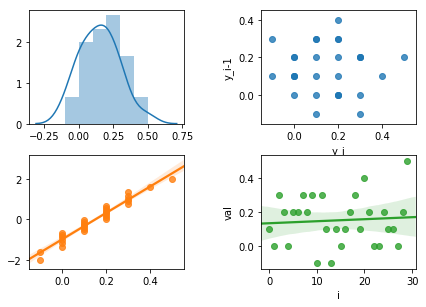

Lag plot for Sorted frame's Year 2000 column:


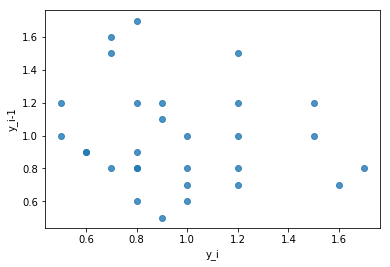

Lag plot for Sorted frame's Year 2010 column:


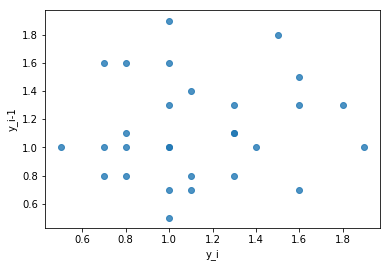

In [28]:
edu_exp = pd.read_csv("data/homework2/education_expenditure_supplementary_data.csv")
edu_exp['institute_type'] = edu_exp['institute_type'].str.strip(" ")
# find all available 'Higher Education Institutions' records
edu_exp_Higher_edu = edu_exp[(edu_exp['institute_type'] == 'Higher Education Institutions') 
                             & (edu_exp['direct_expenditure_type'] == 'Public') 
                             & (~edu_exp['2000'].isnull()) & (~edu_exp['2010'].isnull())]
edu_exp_Higher_edu['difference'] = edu_exp_Higher_edu['2010'] - edu_exp_Higher_edu['2000']

# filter according to year 2000 and year 2010
thresh1 = edu_exp_Higher_edu.loc[edu_exp_Higher_edu['country'] == 'OECD Average', '2000'].values[0]
thresh2 = edu_exp_Higher_edu.loc[edu_exp_Higher_edu['country'] == 'OECD Average', '2010'].values[0]
filter_result = edu_exp_Higher_edu[(edu_exp_Higher_edu['2000'] <= thresh1) 
                                   & (edu_exp_Higher_edu['2010'] >= thresh2) 
                                   & (edu_exp_Higher_edu['country'] != 'OECD Average')]
print('The nations that satify the conditions:')
print(filter_result.country.tolist())
# print(filter_result.sort_values(by='difference'))
print('Sort the nations by difference between 2000 and 2010:')
print(edu_exp_Higher_edu.sort_values(by='difference'))

print('Multiple plot for difference and Year 2010 column:')
# lag plot
ts = multiplePlots(edu_exp_Higher_edu.difference.values)
plt.show()

def lagPlots(series):
    lag = series.copy()
    lag = np.array(lag[:-1])
    current = series[1:]
    ax = sns.regplot(current,lag,fit_reg=False)
    ax.set_ylabel("y_i-1")
    ax.set_xlabel("y_i")

SortedEdu = edu_exp_Higher_edu.sort_values(by='difference')
ts = lagPlots(SortedEdu['2000'].values)
print("Lag plot for Sorted frame's Year 2000 column:")
plt.show()
ts = lagPlots(SortedEdu['2010'].values)
print("Lag plot for Sorted frame's Year 2010 column:")
plt.show()

#### Comment
* Only public institutions have available 'Higher Education Institutions' records thus we filter them first. We record the average of 'OECD Average' in year 2000 & 2010 and filter to get the final result.
* Nations that satisfy the conditions are Spain, Netherlands, France and Iceland.
* Sorted result by difference has been shown and Lag plots are also plotted. We sort the nations by their difference and give the lag plot for year 2000 and 2010 based on the sorted result. It seems that points are distributed randomly in both two lag plots.

### For 10 Points: Using the Times ranking, look at how the Female : Male ratio (`female_male_ratio` column) changes over time.

What were the distributions like in the year 2011 and 2016? How have these distributions changed?

You may want to convert the column values to an easier-to-understand measure, such as a percentage or the ratio of female students (the first numeric value in the ratio entry).

C:\Users\TK\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\TK\Anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\TK\Anaconda\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

None
Mean of female to male ratio in 2011: 1.0469731174239003
Median of female to male ratio in 2011: 1.0833333333333333


C:\Users\TK\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


None
Mean of female to male ratio in 2016: 1.086773443212218
Median of female to male ratio in 2016: 1.0833333333333333
2582    Toyohashi University of Technology
Name: university_name, dtype: object


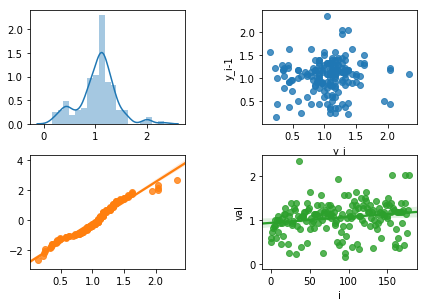

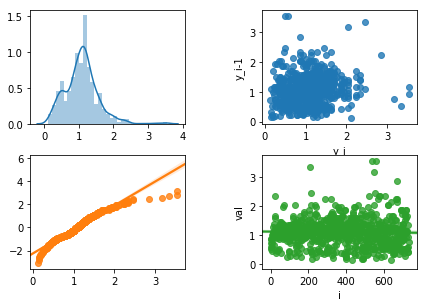

In [48]:
import numpy as np
times['female_male_ratio'] = times['female_male_ratio'].str.replace(" ", "")
times['female_male_ratio'] = times['female_male_ratio'].str.replace(":", "")
# divide the female and male and set up two new columns
times['female'] = times['female_male_ratio'].str[0:2]
times['male'] = times['female_male_ratio'].str[2:]
# filter for ratio
times_ratio = times[(~times.female.isnull()) & (~times.male.isnull())]
times_ratio['female'] = times_ratio['female'].apply(lambda x: int(x) if str.isdigit(x) else np.nan)
times_ratio['male'] = times_ratio['male'].apply(lambda x: int(x) if str.isdigit(x) else np.nan)
times_ratio['ratio'] = times_ratio['female']/times_ratio['male']

# for year 2011
times_ratio_2011_values = times_ratio[times_ratio['year'] == 2011].ratio.values
print(multiplePlots(times_ratio_2011_values))
# find mean and median
print('Mean of female to male ratio in 2011:', np.mean(times_ratio_2011_values))
print('Median of female to male ratio in 2011:', np.median(times_ratio_2011_values))

# for year 2016
times_ratio_2016_values = times_ratio[(times_ratio['year'] == 2016) 
                                      & (times_ratio['ratio'] < 99)].ratio.dropna().values
print(multiplePlots(times_ratio_2016_values))
# find mean and median
print('Mean of female to male ratio in 2016:', np.mean(times_ratio_2016_values))
print('Median of female to male ratio in 2016:', np.median(times_ratio_2016_values))
print(times_ratio[times_ratio['ratio'] == 99].university_name)


Note--Data Pre-processing:
* We set up two new columns 'female' and 'male' to divide the original female_male_ratio column and calculate the final ratio by female/male. Also, NAN and Inf values have been ignored in the following analysis.


#### Comment for year 2011
* The mean of female to male ratio in 2011 is 1.047 and the median is 1.083.
* The QQ plot and histogram plot of 'female to male ratio in 2011' distribution show that it looks like normal distribution. Most of the points are located through a line in QQ plot. Lag plot and Reg plot have shown the randomness feature, which means that the correlation can be ignored here.

#### Comment for year 2016
* The mean of female to male ratio in 2016 is 1.087 and the median is 1.083. Compared with year 2011, the mean value becomes larger while the median value keeps almost the same.
* An important observation is the extreme point here. 'Toyohashi University of Technology' has very large female to male ratio in 2016 (the ratio is 99), which may have big influence on the distribution visualization result. Thus we ignore this point here in order to get more detailed analysis result. 
* The histogram plot of 'female to male ratio in 2016' distribution shows that it looks like normal distribution but the QQ plot indicates that it is a little bit right skewed because of its heavy tails on two sides. Lag plot and Reg plot have shown the randomness feature, which means that the correlation can be ignored here.

### *Bonus* – For 5 Points: Which, if any, of the rankings from the Kaggle data set support the claims made in [this Times Higher Education article on public schools](https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states)?

Justify your claim with specific examples or data.

In [58]:
import re
import html5lib

rank_thresh = 100
# filter top USA universities in three rankings
# CWUR ranks
cwu_usa = cwu[(cwu.country == 'USA') & (cwu.world_rank <= rank_thresh) & (cwu.year == 2015)]
cwu_usa_name = cwu_usa.institution.tolist()

# Times ranks

times.loc[times['university_name'] =='University of Michigan','university_name']='University of Michigan-Ann Arbor'
times_usa = times[(times.country == 'United States of America') & (times.year == 2016)]
times_usa = times_usa[~times_usa.world_rank.str.contains('-')]
times_usa['world_rank'] = times_usa['world_rank'].str.strip('=').astype(int)
times_usa = times_usa[times_usa['world_rank'] <= rank_thresh]
times_usa_name = times_usa.university_name.tolist()

# Shanghai ranks
school_country = pd.read_csv("data/homework2/school_and_country_table.csv")
shanghai_usa = shanghai[(shanghai.year == 2015) & (~shanghai.world_rank.str.contains('-'))]
shanghai_usa.world_rank = shanghai_usa.world_rank.astype(int)
shanghai_usa = shanghai_usa[shanghai_usa.world_rank <= rank_thresh]

def getNation(name):
    unique_list = school_country.school_name.unique().tolist()
    if name in unique_list:
        nation = school_country[school_country.school_name == name].country.values[0]
    else:
         nation = np.nan   
    return nation

shanghai_usa['nation'] = shanghai_usa['university_name'].apply(lambda x: getNation(x))
shanghai_usa['national_rank'] = shanghai_usa['national_rank'].astype(int)
nan_shanghai_usa = shanghai_usa[(shanghai_usa.nation.isnull()) & (shanghai_usa.national_rank >= 15)]
nan_shanghai_usa_name = nan_shanghai_usa.university_name.tolist()
part_shanghai_usa = shanghai_usa[shanghai_usa.nation == 'United States of America']
part_shanghai_usa_name = part_shanghai_usa.university_name.tolist()
shanghai_usa_name = part_shanghai_usa_name + nan_shanghai_usa_name

# list some top public universities in US
url = 'https://www.timeshighereducation.com/student/best-universities/best-public-universities-united-states'
public_list = pd.read_html(url, header=0)
public_list = public_list[0]
public_list.loc[public_list['University'] =='University of Michigan','University']='University of Michigan-Ann Arbor'
public_name = public_list.University.tolist()

def deleteString(string):
    return re.sub('[^A-Za-z]','',string)

def deleteStringlist(list0):
    list1 = []
    for item in list0:
        list1.append(deleteString(item))
    return list1

public_s = deleteStringlist(public_name)
cwu_s = deleteStringlist(cwu_usa_name)
times_s = deleteStringlist(times_usa_name)
shanghai_s = deleteStringlist(shanghai_usa_name)

# find the number of some common public universities 
print('Number of Public Universities in TOP 100 in CWUR:',len(list(set(public_s).intersection(cwu_s))))
print(list(set(public_s).intersection(cwu_s)))
print('Number of Public Universities in TOP 100 in Times:',len(list(set(public_s).intersection(times_s))))
print(list(set(public_s).intersection(times_s)))
print('Number of Public Universities in TOP 100 in Shanghai:',len(list(set(public_s).intersection(shanghai_s))))
print(list(set(public_s).intersection(shanghai_s)))

# find those five top public universities
top = ['University of California-Los Angeles', 'University of Michigan-Ann Arbor', 
       'University of California-Berkeley', 'University of North Carolina at Chapel Hill',
       'University of California-Davis']
top_s = deleteStringlist(top)
print('Number of TOP 5 Public Universities in TOP 100 in CWUR:',len(list(set(top_s).intersection(cwu_s))))
print('Number of TOP 5 Public Universities in TOP 100 in Times:',len(list(set(top_s).intersection(times_s))))
print('Number of TOP 5 Public Universities in TOP 100 in Shanghai:',len(list(set(top_s).intersection(shanghai_s))))
public_list.head(5)

C:\Users\TK\Anaconda\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Number of Public Universities in TOP 100 in CWUR: 20
['GeorgiaInstituteofTechnology', 'UniversityofNorthCarolinaatChapelHill', 'UniversityofCaliforniaBerkeley', 'UniversityofMinnesotaTwinCities', 'UniversityofMichiganAnnArbor', 'UniversityofCaliforniaIrvine', 'UniversityofCaliforniaSantaBarbara', 'UniversityofCaliforniaDavis', 'UniversityofUtah', 'UniversityofIllinoisatUrbanaChampaign', 'UniversityofTexasatAustin', 'UniversityofVirginia', 'UniversityofWisconsinMadison', 'UniversityofColoradoBoulder', 'UniversityofCaliforniaSanDiego', 'UniversityofCaliforniaLosAngeles', 'ArizonaStateUniversity', 'UniversityofArizona', 'UniversityofMarylandCollegePark', 'UniversityofFlorida']
Number of Public Universities in TOP 100 in Times: 16
['GeorgiaInstituteofTechnology', 'UniversityofNorthCarolinaatChapelHill', 'UniversityofCaliforniaBerkeley', 'OhioStateUniversity', 'UniversityofMichiganAnnArbor', 'PennsylvaniaStateUniversity', 'UniversityofCaliforniaSantaBarbara', 'UniversityofCaliforniaDavis', 

,Public university rank 2019,WSJ/THE US College Rank 2019,University,City,State
0,1,25,"University of California, Los Angeles",Los Angeles,California
1,2,28,University of Michigan-Ann Arbor,Ann Arbor,Michigan
2,3,=33,"University of California, Berkeley",Berkeley,California
3,4,=37,University of North Carolina at Chapel Hill,Chapel Hill,North Carolina
4,5,=41,"University of California, Davis",Davis,California


### Some claims from this Report
* There are clusters of high-ranking institutions in California and New York. Just over 20 of the best public universities are present in the top 100 of the overall US College Rankings.
* Top 5 public universities in the US are University of California-Los Angeles, University of Michigan-Ann Arbor, University of California-Berkeley, University of North Carolina at Chapel Hill and University of California-Davis in order.

#### Comment
* Here we read the table online which contains some common top public universities first.
* Then we filter US universities in TOP100 in latest rankings and compare them with our common top public universities list. Except for some name difference, the approximation of number of TOP public universities has been given. Generally speaking, there are about 20 public universities in US appearing in TOP 100 in CWUR ranks, 16 in Times ranks and 20 in Shanghai ranks. 
Also, there are about 12 public universities in TOP 50 and 8 in TOP 30 in Shanghai ranks (highest among these three ranks). 
* All five top public universities mentioned in the report are also in TOP 100 in three ranks.
* According to the output above, it is obvious that universities like 'University of California Davis', 'University of California San Diego', 'University of California Irvine', 'University of California Berkeley', 'University of California Los Angeles' and 'University of California Santa Barbara' appear in ranks. It indicates that clusters of high-ranking institutions do exist.
* Based on the analysis above, Shanghai supports most of the claims in the report among all these three rankings.